<a href="https://colab.research.google.com/github/Adaline-K/git4-collaboration-sourcetree/blob/master/image_test04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Feature Extraction**

In [ ]:
#이미지 미분:가로, 세로, 위치 변화에 따른 픽셀 값의 변화율
#엣지추출: 이미지 안에서 픽셀값이 갑자기 변하는 곳, 이미지를 미분한 그레디언트 벡터의 크기로 판단
#Sobel edge Detection, Canny edge Detection
#Laplacian-미분분

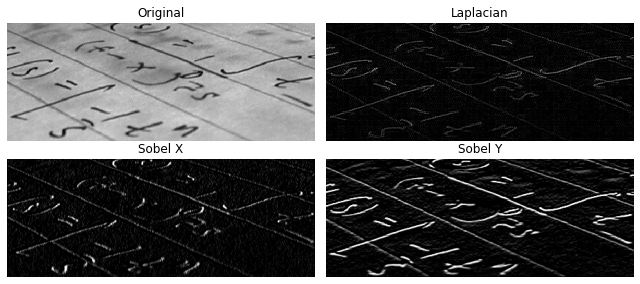

In [ ]:
from skimage.data import text
import cv2
import matplotlib.pylab as plt

img =text()

sobelx = cv2.Sobel(img, cv2.CV_8U, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_8U, 0, 1, ksize=3)
laplacian = cv2.Laplacian(img, cv2.CV_8U)

plt.figure(figsize=(9,4))
plt.subplot(2,2,1)
plt.imshow(img, cmap ='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian')
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X')
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y')
plt.axis("off")
plt.tight_layout()
plt.show()


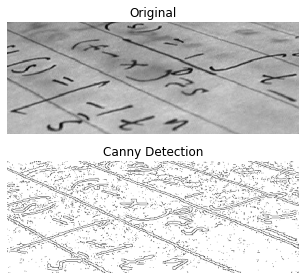

In [ ]:
img = text()
edges= cv2.Canny(img, 50, 50)

plt.subplot(2,1,1)
plt.imshow(img, cmap ='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(2,1,2)
plt.imshow(edges, cmap="Greys", alpha=0.7)
plt.title("Canny Detection")
plt.axis('off')


plt.tight_layout()
plt.show()

#코너 검출(Corner):엣지가 교차되는 점

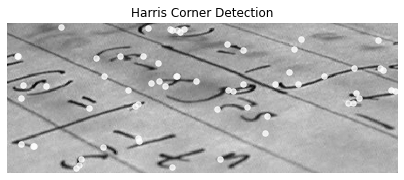

In [ ]:
#해리스코너 추출
#이미지 위에 커널을 이동시키면서 그레디언트의 변화량을 구하고 이 값을 적절한 기준값으로 구별하여 코너점 찾기

import numpy as np

dst= cv2.cornerHarris(img, 2, 3, 0.24)

#thresholding
ret, dst = cv2.threshold(dst, 0.001 *dst.max(), 1, 0)

x,y= np.nonzero(dst)

plt.figure(figsize=(7,7))
plt.title("Harris Corner Detection")
plt.axis("off")
plt.imshow(img, cmap="gray")
plt.scatter(y, x, s=30, c='w', alpha=0.8)
plt.show()

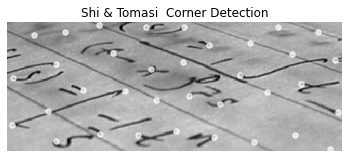

In [ ]:
#Shi & Tomasi 코너 추출
#Harris코너 추출법은 모든 방향으로 그레디언트 변화량이 큰 지점을 코너
#Shi & Tomas 코너 추출법은 더 작은 변화를 보이는 방향의 변화량이 설정한 기준값보다 크면 코너라고 판단
# goodFeaturesToTrack(img, maxCorners, qualityLevel, minDistance)

corners = cv2.goodFeaturesToTrack(img, 100, 0.001, 40)
corners = np.int0(corners)

plt.title("Shi & Tomasi  Corner Detection")
plt.imshow(img, cmap="gray")
plt.scatter(corners[:, 0,0], corners[:, 0,1], s=30, c='w', alpha=0.7)
plt.axis('off')
plt.show()

In [ ]:
#Hough line transformation:검출된 엣지로부터 직선을 이루는 부분 찾기
#이 직선이 많은 엣지 좌표들을 지난다면, 그것이 이미지에 있는 직선일 확률이 높다

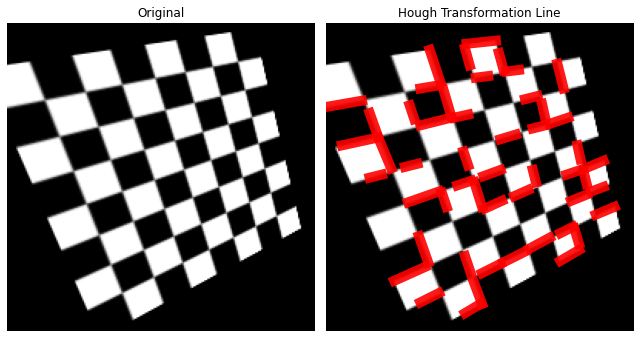

In [ ]:
from skimage.data import checkerboard

img = checkerboard()
rows, cols = img.shape

pts1= np.float32([[25,25], [175,25], [25,175], [175,175]])
pts2= np.float32([[25, 50], [150,25], [75,175], [175,125]])

H = cv2.getPerspectiveTransform(pts1, pts2)
img= cv2.warpPerspective(img, H, (cols, rows))

edges = cv2.Canny(img, 100, 150, apertureSize=3)
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 50, 50,8)

plt.figure(figsize=(9,7))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img, cmap='gray')
plt.axis("off")

for i in range(len(lines)):
  for x1, y1, x2, y2 in lines[i]:
    plt.plot([x1, x2], [y1, y2], c='r', lw=10, alpha=0.9)

plt.title("Hough Transformation Line")

plt.tight_layout()
plt.show()

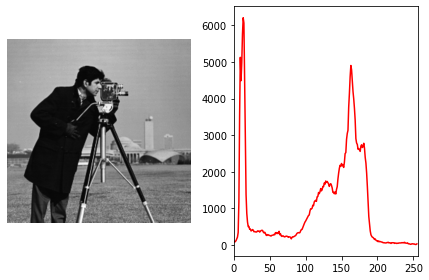

In [ ]:
#image Histogram

from skimage.data import camera
img= camera()

hist= cv2.calcHist([img], [0], None, [256], [0,256])

plt.subplot(121)
plt.imshow(img, "gray")
plt.axis("off")

plt.subplot(122)
plt.plot(hist, color='r')
plt.xlim([0,256])

plt.tight_layout()
plt.show()

In [ ]:
#SIFT(Scale-Invariant Feature Transform): 특징점의 크기와 각도까지 같이 계산하여 이미지의 크기가 변하거나 회전해도 동일한 특징점 찾기

import cv2
from skimage.data import camera

img = camera()

rows, cols = img.shape
H= cv2.getRotationMatrix2D((cols/2, rows/2), 90, 0.7)
img_rotated = cv2.warpAffine(img, H, (cols, rows))
sift = cv2.xfeatures2d.SIFT_create()
kps, des = sift.detectAndCompute(img, None)
kps_r, des_r = sift.detectAndCompute(img_rotated, None)
kp0 = kps[0]

print("pt=({},{}), size={}, angle={}".format(kp0.pt[0], kp0.pt[1], kp0.size, kp0.angle))